In [5]:
# Necessary restart
data = read('data/credit-data.csv')
li = 1
fi = [2,3,4,5,6,7,8,9,10,11,12]
label = data.columns[li]
features = list(data.columns[fi])
convert_vartype(data, label, 'bool')
convert_vartype(data, 'NumberOfDependents', 'int')
fill_miss(data, 'MonthlyIncome', method='mean')
fill_miss(data, 'NumberOfDependents', method='median')

In [6]:
discretize(data, 'MonthlyIncome', 5, 'ufov')
discretize(data, 'age', 5, 'uv')
discretize(data, 'DebtRatio', 5, 'logspace')

Warning, DebtRatio has negative or zero values


In [8]:
def gen_dummies(df, varnames, drop=True):
    '''
    Given a dataframe and certain column, returns a set of dummies
    '''
    for var in varnames:
        for i, value in enumerate(df[var].unique()):
            print(i+1, type(value), value)
            df[var + '_{}'.format(i+1)] = df[var] == value
        
        if drop:
            df.drop(var, inplace=True, axis=1)

In [7]:
data.dtypes

PersonID                                   int64
SeriousDlqin2yrs                            bool
RevolvingUtilizationOfUnsecuredLines     float64
age                                        int64
zipcode                                    int64
NumberOfTime30-59DaysPastDueNotWorse       int64
DebtRatio                                float64
MonthlyIncome                            float64
NumberOfOpenCreditLinesAndLoans            int64
NumberOfTimes90DaysLate                    int64
NumberRealEstateLoansOrLines               int64
NumberOfTime60-89DaysPastDueNotWorse       int64
NumberOfDependents                       float64
MonthlyIncome_cat                       category
age_cat                                 category
DebtRatio_cat                           category
dtype: object

In [9]:
gen_dummies(data, [#'NumberOfDependents',
                   'age_cat',
                   'DebtRatio_cat',
                   'MonthlyIncome_cat'], drop = True)

1 <class 'str'> (43.6, 65.4]
2 <class 'str'> (21.8, 43.6]
3 <class 'str'> (65.4, 87.2]
4 <class 'str'> (87.2, 109]
5 <class 'str'> (-0.109, 21.8]
1 <class 'str'> (0.642, 51.386]
2 <class 'str'> (0.00801, 0.642]
3 <class 'str'> (4115.828, 3.3e+05]
4 <class 'str'> (51.386, 4115.828]
5 <class 'float'> nan
6 <class 'str'> [0.0001, 0.00801]
1 <class 'str'> (8250, 3008750]
2 <class 'str'> [0, 3400]
3 <class 'str'> (3400, 5400]
4 <class 'str'> (5400, 6670.221]
5 <class 'str'> (6670.221, 8250]


### Initial Settings

In [3]:
import sys
sys.path.append('./MachineLearning ToolBox')

from Pipeline1_read import read
from Pipeline2_explore import tabular, histogram
from Pipeline3_preprocess import check_miss, fill_miss, convert_vartype
from Pipeline4_features import display_importance, discretize, gen_dummies
from Pipeline5_classifier import classify
from Pipeline6_evaluate import evaluate, plot_roc

%matplotlib inline

/home/student/.local/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Step 1. Read/Load Data

In [4]:
# Read Data into Pandas object
data = read('data/credit-data.csv')

## Step 2. Explore Data

In [3]:
# Peek at columns to understand potential features and labels
data.dtypes

PersonID                                  int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [5]:
# Our dependent variable (label) is 'SeriousDlqin2yrs'
# Our independent variables (features) are all column names other 
# than 'PersonID' and the label

li = 1
fi = [2,3,4,5,6,7,8,9,10,11,12]
label = data.columns[li]
features = list(data.columns[fi])

In [6]:
for varname in features:
    print(tabular(data,varname))

          RevolvingUtilizationOfUnsecuredLines   Percent
0.000000                                 10878  0.072520
1.000000                                 10256  0.068373
1.000000                                    17  0.000113
0.950100                                     8  0.000053
0.713147                                     6  0.000040
0.007984                                     6  0.000040
0.954092                                     6  0.000040
0.994012                                     5  0.000033
0.004999                                     5  0.000033
0.582834                                     5  0.000033
0.046048                                     5  0.000033
0.988024                                     5  0.000033
0.717131                                     5  0.000033
0.538922                                     5  0.000033
0.850299                                     5  0.000033
0.796407                                     5  0.000033
1.003322                       

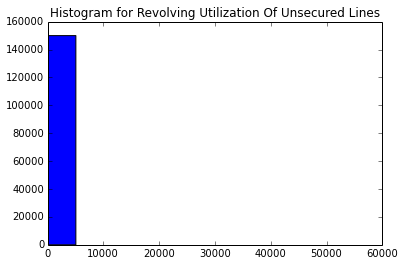

None


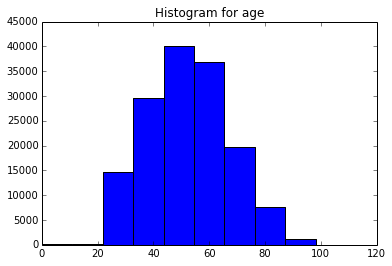

None


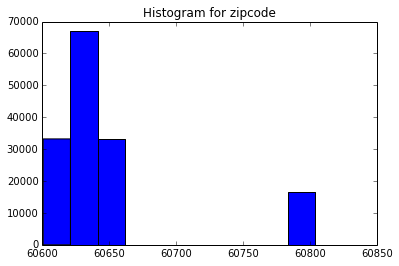

None


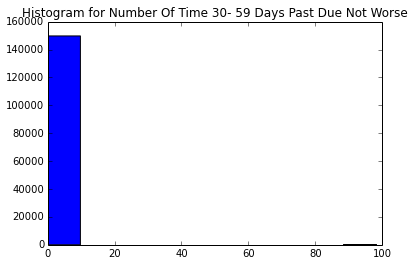

None


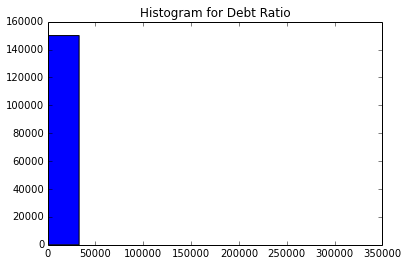

None


AttributeError: max must be larger than min in range parameter.

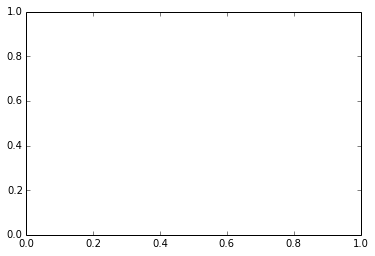

In [7]:
for varname in features:
    print(histogram(data,varname))

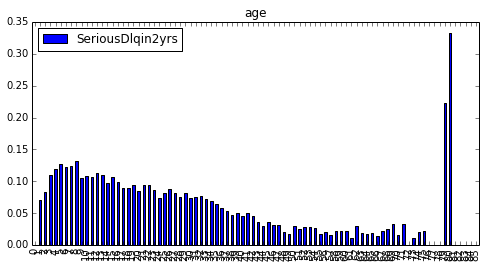

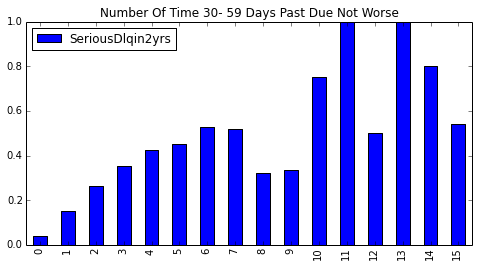

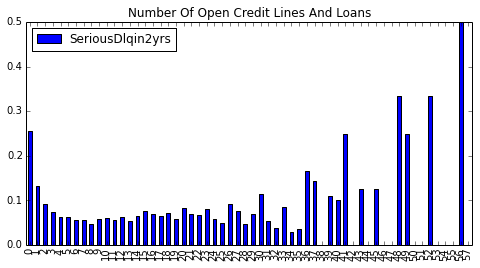

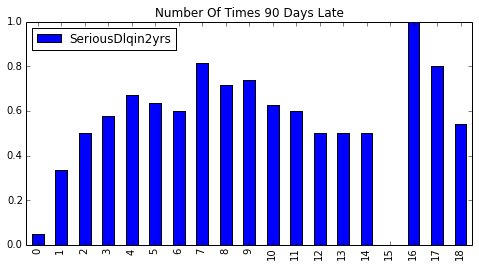

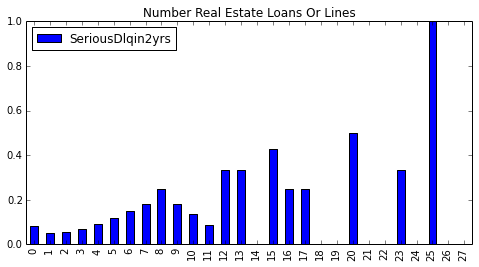

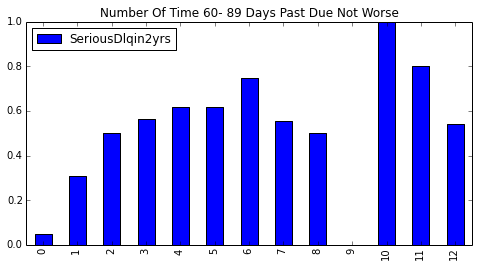

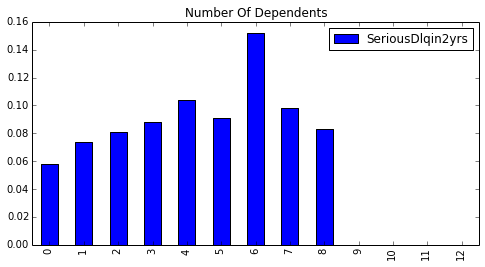

In [26]:
for varname in ['age',
                'NumberOfTime30-59DaysPastDueNotWorse',
                'NumberOfOpenCreditLinesAndLoans',
                'NumberOfTimes90DaysLate',
                'NumberRealEstateLoansOrLines',
                'NumberOfTime60-89DaysPastDueNotWorse',
                'NumberOfDependents']:
    explore_varname(data,varname,label,'bar')["graph"]

## Step 3. Pre-process data

In [28]:
# Fix variable types
convert_vartype(data, label, 'bool')
convert_vartype(data, 'NumberOfDependents', 'int')

In [18]:
# Check for missing values
check_miss(data)

MonthlyIncome has missing values!
NumberOfDependents has missing values!


In [19]:
# Fill missing values
fill_miss(data, 'MonthlyIncome', method='mean')
fill_miss(data, 'NumberOfDependents', method='median')

In [31]:
# Check for missing values
check_miss(data)

No missing values!


## Step 4. Create Features

In [10]:
d= {'k':'kimbu','n':'noel','w':'wow'}

In [12]:
d['k']

'kimbu'

In [60]:
def discretize(df, varname, nbins, method='ufov'):
    '''
    Discretizes given "varname" into "nbins".

    Inputs:
            - df: name of pandas DataFrame
            - varname: name of variable to be discretized
            - nbins: number of categories to create
            - method: can be 'quantile', 'uniform', 'linspace' or 'logspace'

    Returns: nothing. Modifies "df" in place
    '''
    
    assert varname in df.columns, "Column '{}' not in DataFrame".format(varname)
    assert len(df[varname].value_counts()) > nbins, "Number of bins too large"

    if method == 'ufov': # Uniform frequency of values
        df[varname + '_cat'] = pd.qcut(df[varname], nbins)
    elif method == 'uv': # Uniform values
        df[varname+'_cat'] = pd.cut(df[varname], nbins)
    elif method == 'linspace':
        minval = min(df[varname])
        maxval = max(df[varname])
        bins = np.linspace(minval, maxval, nbins+1)
        df[varname+'_cat'] = pd.cut(df[varname], bins, include_lowest=True)
    elif method == 'logspace':
        minval = min(df[varname])
        maxval = max(df[varname])
        assert maxval > 0, 'Column {} has only neg or zero numbers'.format(varname)
        if minval <= 0:
            print('Warning, {} has negative or zero values'.format(varname))
            minval = 0.0001
        bins = np.logspace(np.log10(minval), np.log10(maxval), num = nbins + 1)
        df[varname + '_cat'] = pd.cut(df[varname], bins, include_lowest = True)
    else:
        raise ValueError("{} not currently avaliable. Try one of the following: 'ufov','uv','linspace','logspace'.".format(method))

In [38]:
discretize(data, 'MonthlyIncome', 5, 'ufov')
discretize(data, 'age', 5, 'uv')
discretize(data, 'DebtRatio', 5, 'logspace')

Warning, DebtRatio has negative or zero values


In [78]:
data.dtypes

PersonID                                  int64
SeriousDlqin2yrs                           bool
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
(43.6, 65.4]_0                             bool
(21.8, 43.6]_1                             bool
(65.4, 87.2]_2                             bool
(87.2, 109]_3                              bool
(-0.109, 21.8]_4                           bool
(0.642, 51.386]_0                          bool
(0.00801, 0.642]_1                         bool
(4115.828, 3.3e+05]_2                   

In [ ]:
## From Lab

cat_cols = [  'teacher_prefix', 'primary_focus_area','poverty_level']
cleaned_main_variables = binarize_categories(main_variables, cat_cols, drop=True)

In [75]:
temp = gen_dummies(data, [#'NumberOfDependents',
                   'age_cat',
                   'DebtRatio_cat',
                   'MonthlyIncome_cat'], drop = True)

i: 0 
 x: (43.6, 65.4]
i: 1 
 x: (21.8, 43.6]
i: 2 
 x: (65.4, 87.2]
i: 3 
 x: (87.2, 109]
i: 4 
 x: (-0.109, 21.8]
i: 0 
 x: (0.642, 51.386]
i: 1 
 x: (0.00801, 0.642]
i: 2 
 x: (4115.828, 3.3e+05]
i: 3 
 x: (51.386, 4115.828]
i: 4 
 x: nan
i: 5 
 x: [0.0001, 0.00801]
i: 0 
 x: (8250, 3008750]
i: 1 
 x: [0, 3400]
i: 2 
 x: (3400, 5400]
i: 3 
 x: (5400, 6670.221]
i: 4 
 x: (6670.221, 8250]


In [77]:
temp['age_cat']

KeyError: 'age_cat'

In [74]:
def gen_dummies(df, varnames, drop=True):
    '''
    Given a dataframe and certain column, returns a set of dummies
    '''
    for v in varnames:
        '''
        dummies = pd.get_dummies(df[v], v)
        df = pd.merge(df, 
                      dummies, 
                      left_index=True, 
                      right_index=True, 
                      how='inner')
        '''
        for i, x in enumerate(df[v].unique()):
            print("i:",i,'\n','x:',x)
            #df[x + '_{}'.format(i)] = df[v] == x
        
        
    if drop:
        df.drop(varnames, inplace=True, axis=1)
    
    return df

In [63]:
data.dtypes

PersonID                                   int64
SeriousDlqin2yrs                            bool
RevolvingUtilizationOfUnsecuredLines     float64
age                                        int64
zipcode                                    int64
NumberOfTime30-59DaysPastDueNotWorse       int64
DebtRatio                                float64
MonthlyIncome                            float64
NumberOfOpenCreditLinesAndLoans            int64
NumberOfTimes90DaysLate                    int64
NumberRealEstateLoansOrLines               int64
NumberOfTime60-89DaysPastDueNotWorse       int64
NumberOfDependents                       float64
MonthlyIncome_cat                       category
age_cat                                 category
DebtRatio_cat                           category
dtype: object

In [64]:
w.dtypes

PersonID                                  int64
SeriousDlqin2yrs                           bool
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
age_cat_(-0.109, 21.8]                    uint8
age_cat_(21.8, 43.6]                      uint8
age_cat_(43.6, 65.4]                      uint8
age_cat_(65.4, 87.2]                      uint8
age_cat_(87.2, 109]                       uint8
DebtRatio_cat_[0.0001, 0.00801]           uint8
DebtRatio_cat_(0.00801, 0.642]            uint8
DebtRatio_cat_(0.642, 51.386]           

### Step 5. Classify

In [108]:
X = data.loc[:, ('NumberOfDependents','MonthlyIncome_cat_1','MonthlyIncome_cat_2', 
       'MonthlyIncome_cat_3','MonthlyIncome_cat_4', 'MonthlyIncome_cat_5',
       'age_cat_1', 'age_cat_2', 'age_cat_3', 'age_cat_4', 'age_cat_5'
       'DebtRatio_cat_1', 'DebtRatio_cat_2', 'DebtRatio_cat_3',
       'DebtRatio_cat_4', 'DebtRatio_cat_5','DebtRatio_cat_6')]

In [109]:
X.dtypes

NumberOfDependents          float64
MonthlyIncome_cat_1            bool
MonthlyIncome_cat_2            bool
MonthlyIncome_cat_3            bool
MonthlyIncome_cat_4            bool
MonthlyIncome_cat_5            bool
age_cat_1                      bool
age_cat_2                      bool
age_cat_3                      bool
age_cat_4                      bool
age_cat_5DebtRatio_cat_1    float64
DebtRatio_cat_2                bool
DebtRatio_cat_3                bool
DebtRatio_cat_4                bool
DebtRatio_cat_5                bool
DebtRatio_cat_6                bool
dtype: object

In [12]:
main_features= ['NumberOfDependents','MonthlyIncome_cat_1','MonthlyIncome_cat_2', 
       'MonthlyIncome_cat_3','MonthlyIncome_cat_4', 'MonthlyIncome_cat_5',
       'age_cat_1', 'age_cat_2', 'age_cat_3', 'age_cat_4', 'age_cat_5',
       'DebtRatio_cat_1', 'DebtRatio_cat_2', 'DebtRatio_cat_3',
       'DebtRatio_cat_4', 'DebtRatio_cat_5','DebtRatio_cat_6']

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
#Bag,Boost,RF
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [14]:
data.shape

(150000, 29)

In [15]:
label

'SeriousDlqin2yrs'

In [22]:
def classify(df, features, label, method, bagging=False):
    '''
    Given training and testing data for independent variables (features),
    training data for dependent variable, and classifying method,
    return model, X_test, y_test
    '''
    if method == "KNN":
        model = KNeighborsClassifier(n_neighbors = 13, 
                                     metric = 'minkowski', 
                                     weights = 'distance')
    elif method == "Tree":
        if bagging:
            model = BaggingClassifier(model, 
                                      n_estimators = 10, 
                                      max_samples=0.65, 
                                      max_features=1.)
        else:
            model = tree.DecisionTreeClassifier(max_depth = 20,
                                            class_weight = 'balanced')
        
    elif method == "GB":
        model = GradientBoostingClassifier()
    elif method == "Logit":
        if bagging:
            model = BaggingClassifier(model, 
                                      n_estimators = 10, 
                                      max_samples=0.65, 
                                      max_features=1.)
        else:
            model = LogisticRegression('l2',
                                       C = 1,
                                       class_weight = 'balanced')
    elif method == "RF":
        model = RandomForestClassifier(n_estimators=2, 
                                     max_features = 'sqrt', 
                                     max_depth = 20, 
                                     min_samples_split = 2 ,
                                     class_weight = 'balanced')
        
    else:
        raise ValueError('{} not currently avaliable'.format(method))
        
    y = df[label]
    X = df[features]
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.20,
                                                        random_state = 311)
    ''' old method
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    '''
    model.fit(X_train, y_train)

    return model, X_test, y_test

# Old Code

In [23]:
try:
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split

from sklearn.grid_search import ParameterGrid
from sklearn.metrics import roc_auc_score

import pandas as pd

features = ['NumberOfDependents', 'age', 'MonthlyIncome_cat_0',
       'MonthlyIncome_cat_1', 'MonthlyIncome_cat_2', 'MonthlyIncome_cat_3',
       'MonthlyIncome_cat_4', 'DebtRatio_cat_0',
       'DebtRatio_cat_1', 'DebtRatio_cat_2', 'DebtRatio_cat_3',
       'DebtRatio_cat_4', 'DebtRatio_cat_5']

models_to_run = ['RF', 'BA', 'AB', 'LR', 'SVM', 'DT', 'KNN']

X = data.loc[:, features ]

Y = data['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=None)

results_df =  pd.DataFrame(columns=(
        'model_type','clf', 'parameters', 'auc-roc','p_at_5', 'p_at_10', 'p_at_20'))

for model_name in models_to_run:
    print(model_name)
    clf = clfs[model_name]
    parameter_values = large_grid[model_name]

    for p in ParameterGrid(parameter_values):
        clf.set_params(**p)
        y_pred_probs = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
        y_pred_probs_sorted, y_test_sorted = zip(*sorted(zip(y_pred_probs, y_test), reverse=True))
        results_df.loc[len(results_df)] = [model_name, clf, p,
                                       roc_auc_score(y_test, y_pred_probs),
                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,5.0),
                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,10.0),
                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,20.0)]


(120000, 17)
(120000,)


In [41]:
# The task here is to predict who will  experience financial 
# distress in the next two years. The outcome variable (label) 
# in the data is SeriousDlqin2yrs. We have access to other information 
# about this person (as described in the data dictionary). Your assignment 
#is to take this data and build a machine learning pipeline that 
#trains *one* machine learning model on the data. 

from sklearn.model_selection import train_test_split


X = data.loc[:, ('NumberOfDependents', 'age', 'MonthlyIncome_cat_0',
       'MonthlyIncome_cat_1', 'MonthlyIncome_cat_2', 'MonthlyIncome_cat_3',
       'MonthlyIncome_cat_4', 'DebtRatio_cat_0',
       'DebtRatio_cat_1', 'DebtRatio_cat_2', 'DebtRatio_cat_3',
       'DebtRatio_cat_4', 'DebtRatio_cat_5')]

Y = data['SeriousDlqin2yrs']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=None)
    
model = MyClassifier(X_train, Y_train, 'logistic')

model.model.score(X_test, Y_test)

0.93222735021412828

In [50]:
print(model.model.coef_)

  (0, 0)	0.127809847759
  (0, 1)	-0.0249639248121
  (0, 2)	-0.6330416073
  (0, 3)	0.0735662264515
  (0, 4)	0.0156168493632
  (0, 5)	-0.431096931943
  (0, 6)	-0.192146223752
  (0, 7)	-0.0627019385459
  (0, 8)	-0.250363667995
  (0, 9)	-1.00262573203
  (0, 10)	-0.928702764814
  (0, 11)	-0.819218492033


### Step 6. Evaluate

In [42]:
model.model.score(X_test, Y_test)

0.93222735021412828

In [51]:
import pandas as pd

probas = model.model.predict_proba(X_test)

pd.crosstab(Y_test, probas[:,1] > 0.2, rownames=["Actual"], colnames=["Predicted"])

Predicted,False,True
Actual,,
False,22415,6
True,1628,2


In [57]:
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve

In [53]:
accuracy_score(Y_test, probas[:,1] > 0.2)

0.93206103696312004

In [56]:
print(classification_report(Y_test, probas[:,1] > 0.2))

             precision    recall  f1-score   support

      False       0.93      1.00      0.96     22421
       True       0.25      0.00      0.00      1630

avg / total       0.89      0.93      0.90     24051



In [59]:
precision_recall_curve(Y_test, probas[:,1])

(array([ 0.06846151,  0.06842525,  0.06843388, ...,  0.5       ,
         0.        ,  1.        ]),
 array([  1.00000000e+00,   9.99386503e-01,   9.99386503e-01, ...,
          6.13496933e-04,   0.00000000e+00,   0.00000000e+00]),
 array([ 0.01637779,  0.01639506,  0.01653906, ...,  0.21941202,
         0.21992459,  0.23751897]))

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

confusion_matrix(Y_test, model.model.predict(X_test))


In [ ]:
probas = model.model.predict_proba(X_train)

In [ ]:
sum(probas[:,1] > 0.2)

In [ ]:
model.model.predict(X_test)

In [ ]:
d = pd.DataFrame({'a': [5,6,7], 'b':[0,1,3]}, index=[10,13,14])
d = binarize_categories(d, ['a'], True)
d.head()